# Coordenadas de las ciudades

In [1]:
cities = [
    (1,3), (2,5), (2,7), (4,2), (4,4), 
    (4,7), (4,8), (5,3), (6,1), (6,6), 
    (7,8), (8,2), (8,7), (9,3), (10,7), 
    (11,1), (11,4), (11,6), (12,7), (13,5),
]

# Parámetros iniciales

In [2]:
from agente_viajero import AgenteViajero

av = AgenteViajero(cities, population_size=100, n_generations=100, tournament_size=0.07)

# Comparando métodos de reproducción

## Enroque

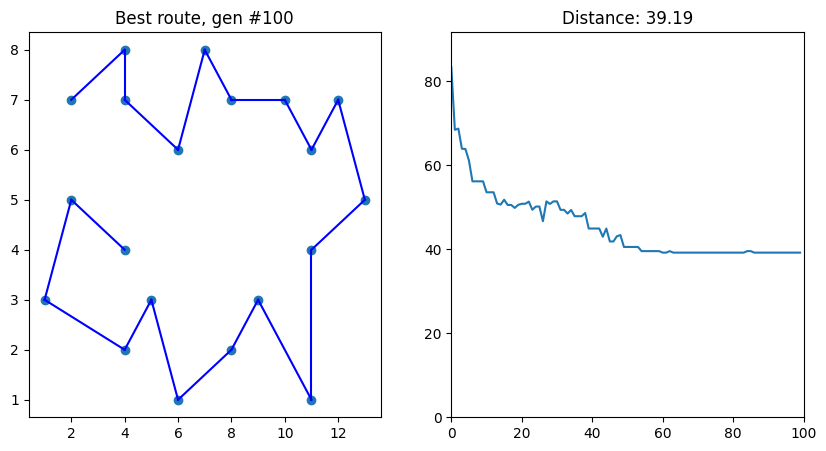

In [3]:
av.train(reprod_functions=[av.castling_reprod], verbose=False)


# Inversión

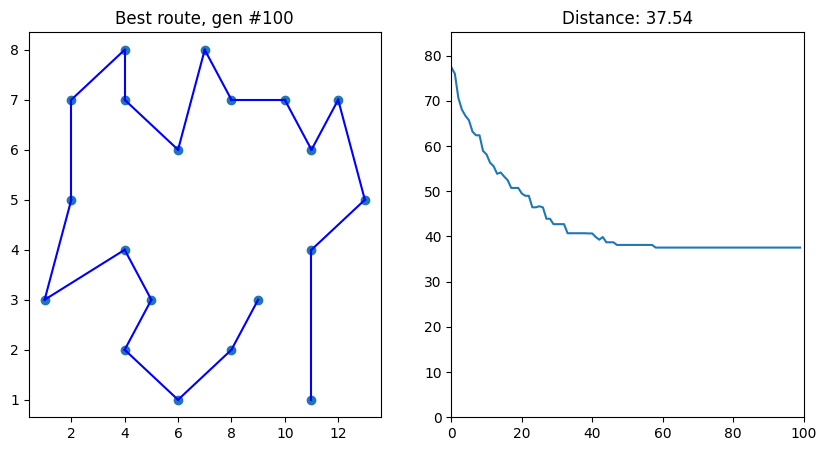

In [4]:
av.train(reprod_functions=[av.inversion_reprod], verbose=False)

## Combinación de ambos

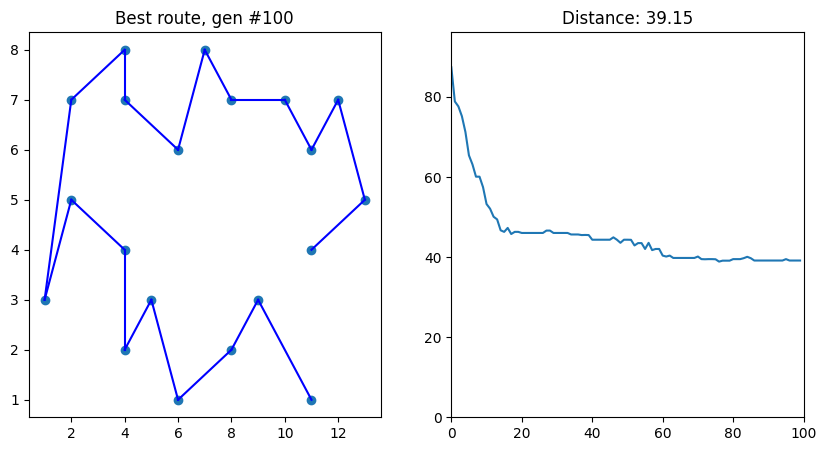

In [5]:
av.train(reprod_functions=[av.castling_reprod, av.inversion_reprod], verbose=False)

# Inversión es mejor para este problema
## (veamos la evolución animada)

In [ ]:
av.train(reprod_functions=[av.inversion_reprod], verbose=True)